In [1]:
import numpy as np
import pandas as pd

In [2]:
"""
Import the dataset
"""
df = pd.read_csv('/content/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
"""
Check NaN value appeared or not
"""
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
"""
Split the dataset into train and test
"""
import torch
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

"""
Should be convert this X and y into Float, Otherwise it will show ERROR
"""
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    test_size = 0.20,\
                                                    random_state = 42,\
                                                    shuffle = True)

print('X_train shape is # {}'.format(X_train.shape),'\n')
print('X_test  shape is # {}'.format(X_test.shape),'\n')
print('y_train shape is # {}'.format(y_train.shape),'\n')
print('y_test  shape is # {}'.format(y_test.shape))

X_train shape is # torch.Size([614, 8]) 

X_test  shape is # torch.Size([154, 8]) 

y_train shape is # torch.Size([614]) 

y_test  shape is # torch.Size([154])


In [5]:
X_train[0:2]

tensor([[  2.0000,  84.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.3040,
          21.0000],
        [  9.0000, 112.0000,  82.0000,  24.0000,   0.0000,  28.2000,   1.2820,
          50.0000]])

In [6]:
"""
Import the DataLoader function so that we can initialize the batch_size
"""
import torch
from torch.utils.data import Dataset, DataLoader

data_loader = DataLoader(dataset = list(zip(X_train, y_train)),\
                         batch_size = 16,\
                         shuffle = True)
data, labels = next(iter(data_loader))

print("The shape of singular batch size of training # {}".format(data.size()))
print("The shape of singular batch size of testing  # {}".format(labels.size()))

The shape of singular batch size of training # torch.Size([16, 8])
The shape of singular batch size of testing  # torch.Size([16])


#Creating the ANN architecture

In [7]:
"""
Import the necessity liabries.
"""
import torch.nn as nn

"""
Creating a class that will inherit the parent class named `nn.Module`.
"""
class DiabeticsClassifier(nn.Module):
  """
  Create a constructors that might take some of the parameters. Here, I did not pass anything.
  """
  def __init__(self):
    """
    Call the super() functions that has some properties
    """
    super().__init__()
    """
    Create the first hidden layer with its activation functions
    """
    self.hidden_1 = nn.Linear(in_features = 8,\
                              out_features = 64,\
                              bias = True)
    self.activation_1 = nn.ReLU()

    """
    Create the second hidden hidden layer with its activation function
    """
    self.hidden_2 = nn.Linear(in_features = 64,\
                              out_features = 32,\
                              bias = True)
    self.activation_2 = nn.ReLU()

    """
    Create the output layer with its activation function
    """
    self.output = nn.Linear(in_features = 32,\
                            out_features = 1,\
                            bias = True)
    self.activation_output = nn.Sigmoid()

  def forward(self, x):
    """
    Formula of forward propagation `activation(W^T + B)`; `x` means training dataset
    """
    x = self.activation_1(self.hidden_1(x))
    x = self.activation_2(self.hidden_2(x))
    x = self.activation_output(self.output(x))

    return x

"""
Create an object of this class
"""

model = DiabeticsClassifier()

print(model)

DiabeticsClassifier(
  (hidden_1): Linear(in_features=8, out_features=64, bias=True)
  (activation_1): ReLU()
  (hidden_2): Linear(in_features=64, out_features=32, bias=True)
  (activation_2): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
  (activation_output): Sigmoid()
)


In [8]:
print(model.parameters)

<bound method Module.parameters of DiabeticsClassifier(
  (hidden_1): Linear(in_features=8, out_features=64, bias=True)
  (activation_1): ReLU()
  (hidden_2): Linear(in_features=64, out_features=32, bias=True)
  (activation_2): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
  (activation_output): Sigmoid()
)>


In [9]:
print(model.parameters())

<generator object Module.parameters at 0x7be243a73d10>


In [10]:
from torchsummary import summary

In [11]:
"""
Create the model summary. This will take two parameters(1. Model 2. shape of training/input data)
"""
summary(model, X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 614, 64]             576
              ReLU-2              [-1, 614, 64]               0
            Linear-3              [-1, 614, 32]           2,080
              ReLU-4              [-1, 614, 32]               0
            Linear-5               [-1, 614, 1]              33
           Sigmoid-6               [-1, 614, 1]               0
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.91
Params size (MB): 0.01
Estimated Total Size (MB): 0.94
----------------------------------------------------------------


#Training the model

In [12]:
"""
Import the liabries
"""

import torch.optim as optim

"""
Define the loss function - I am solving `Binary Class Classification`
"""

loss_function = nn.BCELoss()
"""
Define the optimizer - In this case; Adam() optimizer
"""
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [13]:
"""Initialize the number of EPOCH you want to"""
EPOCHS = 100
LOSS = []
model.train()
for iteration, epoch in enumerate(range(EPOCHS)):
  """Call the data_loader so that we can pass the X_train data to the model with batch_size"""
  for X_batch, y_batch in data_loader:
    """Pass the X_batch to the model"""
    prediction = model(X_batch)
    """Calculate the loss function"""
    loss = loss_function(prediction, y_batch.reshape(-1, 1))
    """Append this loss function"""
    LOSS.append(loss)
    """Initialize the Gradient"""
    optimizer.zero_grad()
    """After calculating the loss, we should be done the Backward propagation"""
    loss.backward()
    optimizer.step()
  """Display the loss function"""
  print("For Epoch # {} :: The loss function of this model is ## {}".format(epoch, loss))

For Epoch # 0 :: The loss function of this model is ## 0.687446653842926
For Epoch # 1 :: The loss function of this model is ## 0.9370222091674805
For Epoch # 2 :: The loss function of this model is ## 0.3934587240219116
For Epoch # 3 :: The loss function of this model is ## 0.6038882732391357
For Epoch # 4 :: The loss function of this model is ## 0.992443859577179
For Epoch # 5 :: The loss function of this model is ## 0.6026235818862915
For Epoch # 6 :: The loss function of this model is ## 0.6145830750465393
For Epoch # 7 :: The loss function of this model is ## 0.6781362891197205
For Epoch # 8 :: The loss function of this model is ## 0.40171611309051514
For Epoch # 9 :: The loss function of this model is ## 0.6775991320610046
For Epoch # 10 :: The loss function of this model is ## 0.528370201587677
For Epoch # 11 :: The loss function of this model is ## 0.8693141937255859
For Epoch # 12 :: The loss function of this model is ## 0.3977154493331909
For Epoch # 13 :: The loss function o

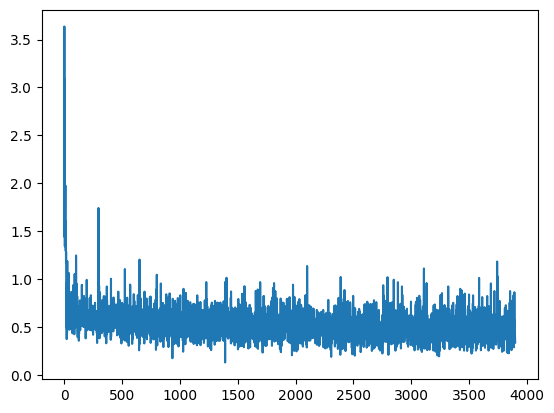

In [14]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(np.array(LOSS))

In [15]:
predicted = model(X_test)

In [16]:
y_pred = torch.where(predicted.flatten() > 0.5, 1, 0)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score is  = ", accuracy_score(y_pred, y_test))
print("The precision score is = ", precision_score(y_pred, y_test))
print("The recall score is    = ", recall_score(y_pred, y_test))
print("The f1 score of ths is = ", f1_score(y_pred, y_test))

The accuracy score is  =  0.7532467532467533
The precision score is =  0.4727272727272727
The recall score is    =  0.7428571428571429
The f1 score of ths is =  0.5777777777777778
